In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

import plotly
import plotly.graph_objects as go
from PIL import Image

In [169]:
players = pd.read_csv("data/players_updated_final.csv")

In [170]:
class Pitch:
    def __init__(self, players):
        self.players = players
        self.position_data = self.marketvalue_grouped_by_position()
        self.position_data = self.convert_position_to_coordinates()
        self.grouped_position_data = self.position_data[['X', 'Y', 'market_value']].groupby(['X', 'Y'])['market_value'].mean().reset_index()
        print(self.grouped_position_data)

    def marketvalue_grouped_by_position(self):
        mean_mkt_val_pos = self.players.groupby('sub_position')['market_value'].mean().reset_index()
        return (mean_mkt_val_pos)

    def convert_position_to_coordinates(self):
        position_coords = {
            'Goalkeeper': (10,45),
            'Right-Back': (25, 20), 'Centre-Back': (25, 45), 'Left-Back': (25, 70),
            'Right Midfield': (65, 20), 'Defensive Midfield': (45, 45), 'Central Midfield': (65, 45), 'Attacking Midfield': (90, 45), 'Left Midfield': (65, 70),
            'Right Winger': (100, 20), 'Second Striker': (90, 45), 'Centre-Forward': (110, 45), 'Left Winger': (100, 70)
        }
        
        self.position_data = self.position_data.dropna(subset=['sub_position'])

        self.position_data['X'] = 0
        self.position_data['Y'] = 0
        
        for ind, row in self.position_data.iterrows():
            position = row['sub_position']
            self.position_data.at[ind, 'X'] = position_coords[position][0]
            self.position_data.at[ind, 'Y'] = position_coords[position][1]
        return self.position_data

In [204]:
pitch = Pitch(players)

      X   Y  market_value
0    10  45  4.053394e+06
1    25  20  6.224934e+06
2    25  45  8.137062e+06
3    25  70  7.153290e+06
4    45  45  8.369900e+06
5    65  20  6.920217e+06
6    65  45  1.008489e+07
7    65  70  7.480000e+06
8    90  45  1.195618e+07
9   100  20  1.066853e+07
10  100  70  1.207207e+07
11  110  45  9.576911e+06


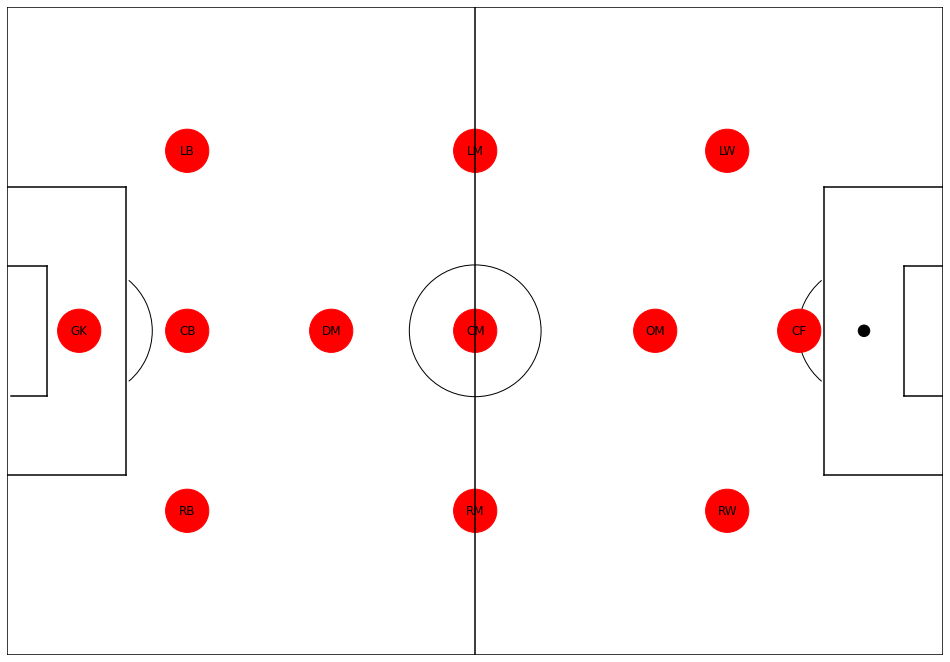

In [186]:
#Create figure
fig=plt.figure()
# fig.set_size_inches(4.333, 3)
fig.set_size_inches(13, 9)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Prepare Positions
gk = plt.Circle((10,45), 3, color="red", fill=True)
lb = plt.Circle((25,20), 3, color="red", fill=True)
cb = plt.Circle((25,45), 3, color="red", fill=True)
rb = plt.Circle((25,70), 3, color="red", fill=True)
lm = plt.Circle((65,20), 3, color="red", fill=True)
cdm = plt.Circle((45,45), 3, color="red", fill=True)
cm = plt.Circle((65,45), 3, color="red", fill=True)
cam = plt.Circle((90,45), 3, color="red", fill=True)
rm = plt.Circle((65,70), 3, color="red", fill=True)
lw = plt.Circle((100,20), 3, color="red", fill=True)
cf = plt.Circle((110,45), 3, color="red", fill=True)
rw = plt.Circle((100,70), 3, color="red", fill=True)


#Draw Positions
ax.add_patch(gk)
ax.add_patch(lb)
ax.add_patch(cb)
ax.add_patch(rb)
ax.add_patch(lm)
ax.add_patch(cdm)
ax.add_patch(cm)
ax.add_patch(cam)
ax.add_patch(rm)
ax.add_patch(lw)
ax.add_patch(cf)
ax.add_patch(rw)

#Add Annotations
ax.annotate("GK", xy=(10, 45), fontsize=12, ha="center", va="center")
ax.annotate("RB", xy=(25, 20), fontsize=12, ha="center", va="center")
ax.annotate("CB", xy=(25, 45), fontsize=12, ha="center", va="center")
ax.annotate("LB", xy=(25, 70), fontsize=12, ha="center", va="center")
ax.annotate("RM", xy=(65, 20), fontsize=12, ha="center", va="center")
ax.annotate("DM", xy=(45, 45), fontsize=12, ha="center", va="center")
ax.annotate("CM", xy=(65, 45), fontsize=12, ha="center", va="center")
ax.annotate("OM", xy=(90, 45), fontsize=12, ha="center", va="center")
ax.annotate("LM", xy=(65, 70), fontsize=12, ha="center", va="center")
ax.annotate("RW", xy=(100, 20), fontsize=12, ha="center", va="center")
ax.annotate("CF", xy=(110, 45), fontsize=12, ha="center", va="center")
ax.annotate("LW", xy=(100, 70), fontsize=12, ha="center", va="center")


#Tidy Axes
plt.axis('off')

plt.ylim(0, 90)
plt.xlim(0, 130)

# Remove Space around Pitch
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)

plt.savefig('pitch_test.jpg')

In [209]:
pitch.grouped_position_data.loc[-1] = [0, 0, 0]
pitch.grouped_position_data.index = pitch.grouped_position_data.index + 1 
pitch.grouped_position_data = pitch.grouped_position_data.sort_index()

In [210]:
end = pd.DataFrame([[130, 90, 0]], columns=["X", "Y", "market_value"])
pitch.grouped_position_data = pitch.grouped_position_data.append(end, ignore_index=True)

In [211]:
pitch.grouped_position_data

,X,Y,market_value
0,0,0,0.000000e+00
1,10,45,4.053394e+06
2,25,20,6.224934e+06
3,25,45,8.137062e+06
4,25,70,7.153290e+06
5,45,45,8.369900e+06
6,65,20,6.920217e+06
7,65,45,1.008489e+07
8,65,70,7.480000e+06
9,90,45,1.195618e+07



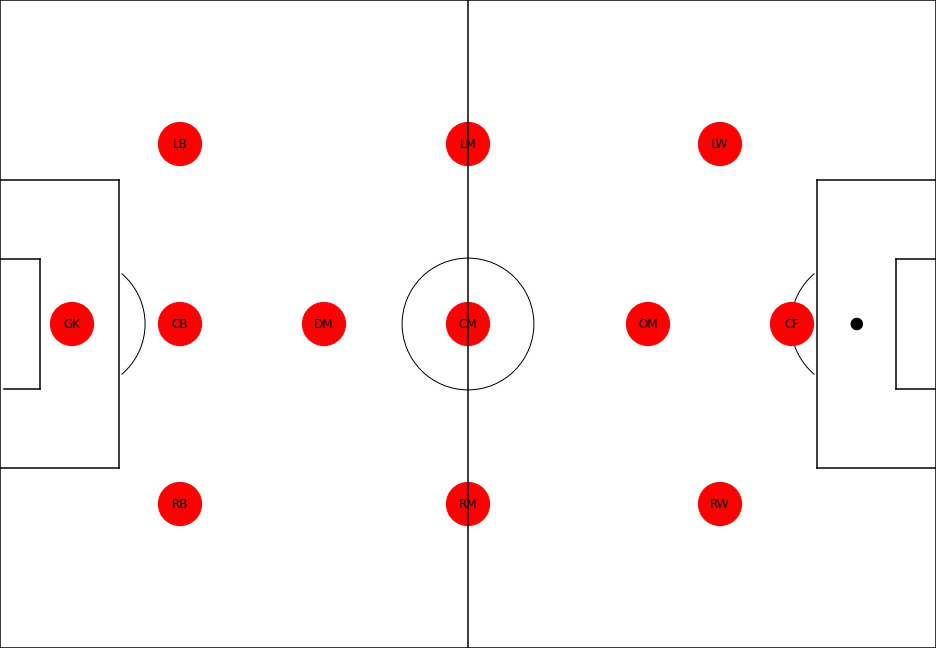

In [222]:
img = Image.open('./pitch_test.jpg')
fig = go.Figure()

fig.add_trace(go.Contour(
        x=pitch.grouped_position_data["X"], 
        y=pitch.grouped_position_data["Y"], 
        z=pitch.grouped_position_data["market_value"],
        showscale=False, 
        connectgaps=True, 
        hoverinfo="none",
        #zsmooth="best",
        opacity=0.5))


# axis hide、yaxis reversed
fig.update_layout(
    autosize=False,
    width=1163,
    height=783,
    xaxis=dict(visible=False,autorange=True),
    yaxis=dict(visible=False,autorange='reversed')
)

# background image add
fig.add_layout_image(
    dict(source=img,
         xref='x',
         yref='y',
         x=0,
         y=0,
         sizex=130,
         sizey=90,
         sizing='stretch',
         opacity=1,
         layer='below')
)


fig.show()

In [206]:
pitch.grouped_position_data

,X,Y,market_value
0,10,45,4.053394e+06
1,25,20,6.224934e+06
2,25,45,8.137062e+06
3,25,70,7.153290e+06
4,45,45,8.369900e+06
5,65,20,6.920217e+06
6,65,45,1.008489e+07
7,65,70,7.480000e+06
8,90,45,1.195618e+07
9,100,20,1.066853e+07
